In [47]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from catboost import CatBoostRegressor

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/Regression with an Abalone Dataset/train.csv")

In [3]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [16]:
df.shape

(90615, 9)

In [6]:
enc = OrdinalEncoder()

In [10]:
df["Sex_encoded"] = enc.fit_transform(df[["Sex"]])
df.drop(["id", "Sex"], axis=1, inplace=True )

In [18]:
df.isna().mean()

Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Whole weight.1    0.0
Whole weight.2    0.0
Shell weight      0.0
Rings             0.0
Sex_encoded       0.0
dtype: float64

In [14]:
X = df.drop("Rings", axis=1)
y = df["Rings"]

In [29]:
X_train, X_valid, y_train, y_valid =  train_test_split(X, y, test_size=0.2)

In [30]:
model = CatBoostRegressor()

In [31]:
model.fit(X_train, y_train, verbose=False, plot=True, eval_set=(X_valid, y_valid));

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [32]:
model.score(X_valid, y_valid)

0.6724219691475446

In [35]:
y_preds = model.predict(X_valid)

In [36]:
mean_squared_log_error(y_valid, y_preds);

In [46]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns)

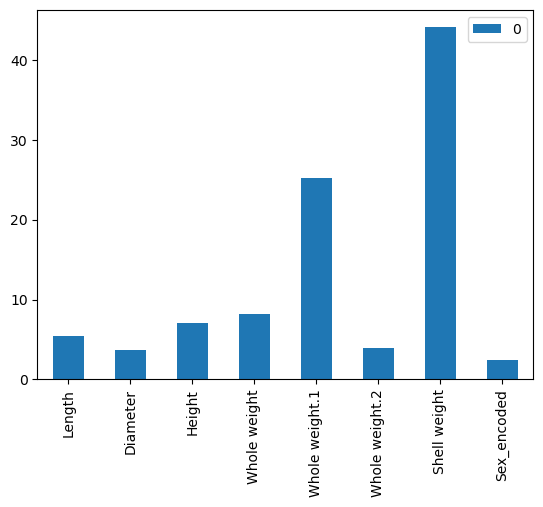

In [50]:
feature_importances.plot(kind="bar");